In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


In [ ]:
# option = {  "option_spec": [,]
#             "position": , 
#             "nominal":,
#             "strike":,
#             "expiry":
# }

def startegy(options, S):
    profit = 0
    for element in options:
        if element["option_spec"][0] == "vanilla": 
            profit += element["position"] * element["nominal"]*max(0, element["option_spec"][1] * (S - element["strike"]))

        elif element["option_spec"][0] == "con":   
            profit += element["position"] * element["nominal"] * (element["option_spec"][1] * (S - element["strike"]) > 0)

        elif element["option_spec"][0] == "aon":
            profit += S * element["position"] * element["nominal"] * (element["option_spec"][1] * (S - element["strike"]) > 0)

    return profit

def strategy_value(options, S, sigma, df_d, df_f):
    value = 0

    for element in options:

        d_1 = (np.log(S / options[0]["strike"]) + np.log(df_f/df_d) +  (sigma**2 / 2) * options[0]["expiry"]) / (sigma * np.sqrt(options[0]["expiry"]))
        d_2 = d_1 - sigma * np.sqrt(options[0]["expiry"])
        n_1 = stats.norm.cdf(element["option_spec"][1] * d_1)
        n_2 = stats.norm.cdf(element["option_spec"][1] * d_2)

        if element["option_spec"][0] == "vanilla": 
            value += element["position"] * element["nominal"] * element["option_spec"][1] * (df_f * S * n_1 - df_d * element["strike"] * n_2)
        elif element["option_spec"][0] == "con":   
            value += element["position"] * element["nominal"] * element["option_spec"][1] * (df_d * element["strike"] * n_2)
        elif element["option_spec"][0] == "aon":
            value += element["position"] * element["nominal"] * element["option_spec"][1] * (df_f * element["strike"] * n_1)
    return value

def unique_strikes(options):
    strikes = [e["strike"] for e in options]
    return np.unique(strikes)

def plot_strategy_value(S_range, options):
    values = [startegy(options, S) for S in S_range]
    strikes = unique_strikes(options)
    plt.figure(figsize=(8, 5))
    for strike in strikes:
        plt.axvline(x=strike, color='g', linestyle='--', label="Strike Price", alpha = 0.3)
    plt.plot(S_range, values, linestyle='-', linewidth=2, color='r', label="Strategy Value")
    plt.xlabel("S", fontsize=12, fontweight='bold')
    plt.ylabel("Wypłata ze strategii", fontsize=12, fontweight='bold')
    plt.title("Wypłata ze strategii", fontsize=14, fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

 



In [ ]:
option_1 = {"option_spec": ["vanilla", 1], "position": 1, "nominal": 1, "strike": 4.1, "expiry": 1}
option_strategy = [option_1]  

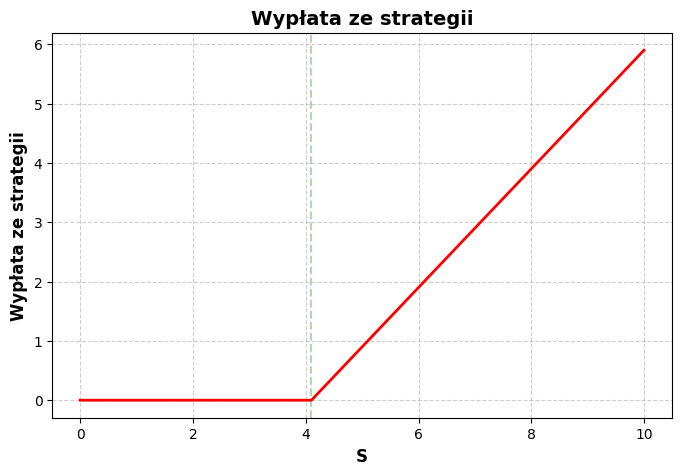

In [16]:
plot_strategy_value( np.linspace(0, 10, 1000), option_strategy)